In [1]:
import numpy as np, matplotlib.pyplot as plt, glob
import subprocess
import sys, os

import matplotlib.colors as mcolors
import matplotlib.cm as cm

from scipy.stats import entropy



mean diff score =  29.595835295895


mean diff score =  23.462780045404607


mean diff score =  20.73155281029174


mean diff score =  14.982130707015202


mean diff score =  16.198367541952734


mean diff score =  14.422285625784056


mean diff score =  14.59450003160499


mean diff score =  13.678235315551145


mean diff score =  14.935809344741452


mean diff score =  16.974882935071783


mean diff score =  15.574078590030403


mean diff score =  14.585278631333757


mean diff score =  13.779442879149862


mean diff score =  14.278435099303426


mean diff score =  14.057808475397039


mean diff score =  14.906068137508239


mean diff score =  13.870565158318973


mean diff score =  14.11140728506212


mean diff score =  12.965474964020936


mean diff score =  11.481141118815398
[29.595835295895, 23.462780045404607, 20.73155281029174, 14.982130707015202, 16.198367541952734, 14.422285625784056, 14.59450003160499, 13.678235315551145, 14.935809344741452, 16.974882935071783, 15.5740785



mean diff score =  14.499698030751942


mean diff score =  17.03419188939591


mean diff score =  10.915310535481176


mean diff score =  14.63839937633421


mean diff score =  11.655699703780206


mean diff score =  11.17454806305286


mean diff score =  13.405095241101268


mean diff score =  12.230128736484001


mean diff score =  9.6114485532779


mean diff score =  10.455438434201074
[23.692854840107735, 17.933346081118735, 18.032817001133058, 15.602220649462307, 14.499698030751942, 17.03419188939591, 10.915310535481176, 14.63839937633421, 11.655699703780206, 11.17454806305286, 13.405095241101268, 12.230128736484001, 9.6114485532779, 10.455438434201074]


Text(0, 0.5, '                                                  Free energy (kJ/mol)')

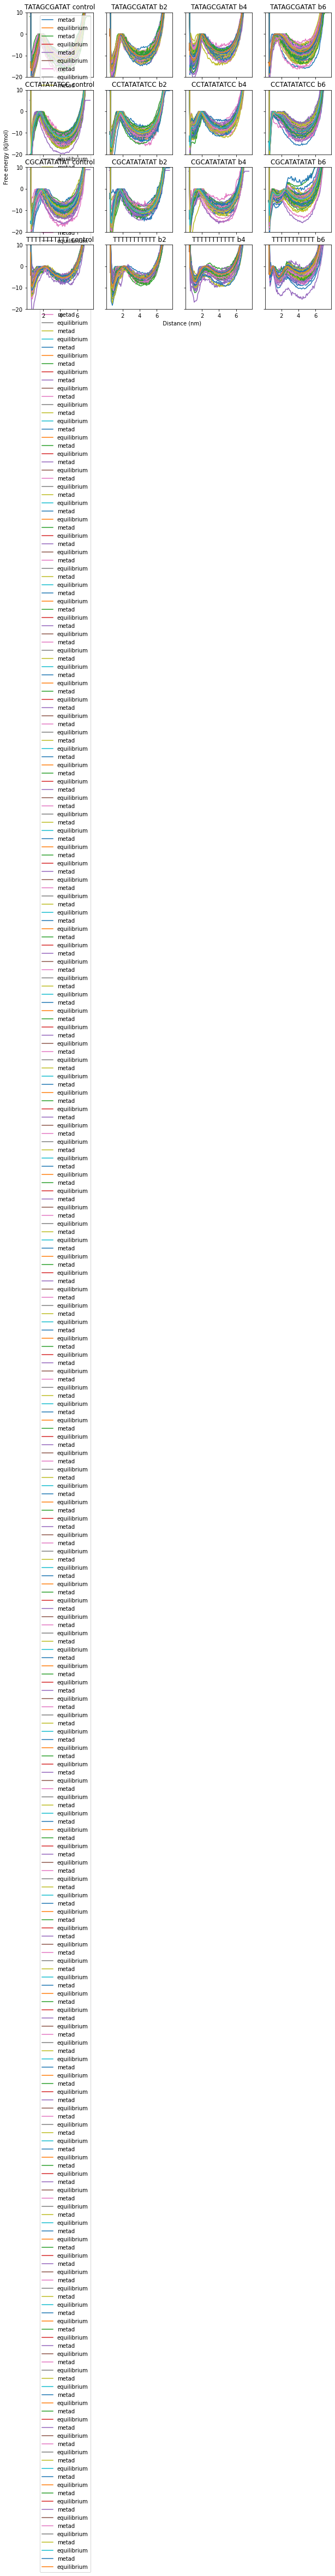

In [2]:
# all fes files should have already been generated using e.g. plot_convergence
seq_list = ['TATAGCGATAT', 'CCTATATATCC', 'CGCATATATAT','TTTTTTTTTTT'] #  #  #'CGCATATATAT'
base_dict = {0:'control', 2:'b2', 4:'b4', 6:'b6'}
fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True)

# specify equilibrium and metad directories
equ_dir = '../equilibrium_FES'
metad_dir = '../11bp_runs_pb_s-0.01_bf-5_h-0.6_ns-1e+09'
#metad_dir = '../11bp_runs_s-0.01_bf-5_h-0.6_ns-1e+09'

# load bins
equ_bins = np.load(f'{equ_dir}/bins_edges.npy')
R = 1.380 * 6.022 / 1000 #kJ/mol/K

# score all runs at once
score_trajs = []
metad_dir_list = glob.glob('../11bp_runs_s*bf-*s-1e+09') + glob.glob('../11bp_runs_pb*s-1e+09')
for metad_dir in metad_dir_list:
    
    mean_score_list = []

    for nfes in range(1, 21):
        diff_scores = []
        
        # for runs that have not completed
        try:
            
            # load fes from equilibrim
            for seq, ax_row in zip(seq_list, axes):
                for (base_idx, base), ax in zip(base_dict.items(), ax_row):

                    # load equilibrium data
                    equ_fes = np.load(f'{equ_dir}/fes_{seq}_{base}.npy')
                    equ_prob = np.load(f'{equ_dir}/prob_{seq}_{base}.npy')
                    #print(seq, base, len(equ_fes))

                    # load metad 
                    fes_path = glob.glob(f'{metad_dir}/{seq}_base-{base_idx}*')[0]
                    fes_list = glob.glob(f'{fes_path}/fes_*.dat')
                    #nfes = 2 #len(fes_list)

                    fes_final = f'{fes_path}/fes_{nfes-1}.dat'
                    with open(fes_final, 'r') as f:
                        metad_data = []
                        lines = f.readlines()
                        for i in range(5, len(lines)):
                            metad_data.append([float(idx) for idx in lines[i].split()])
                        metad_data = np.array(metad_data)
                    f.close()

                    # specify metad bin edges and free energy
                    metad_bins = metad_data[:, 0]
                    metad_fes = metad_data[:, 1]

                    # normalize fes
                    equ_fes = equ_fes-max(equ_fes[5:30])  #min(equ_fes)
                    metad_fes = metad_fes-max(metad_fes[5:30])   #min(metad_fes)

                    # calculate differcen between two
                    diff = np.sqrt(np.sum((equ_fes[2:80]-metad_fes[2:80])**2))
                    diff_scores.append(diff)
                    #print(diff, equ_bins[:3], metad_bins[:3])

                    if 'inv' in metad_dir: 
                        ax.plot(1/metad_bins, metad_fes, label='metad')
                        print(metad_bins[:3], (1/metad_bins)[:3])
                    else: ax.plot(metad_bins, metad_fes, label='metad')
                    ax.plot(equ_bins[:-1], equ_fes, label='equilibrium')
                    ax.set_title(f'{seq} {base}')
                    ax.set_ylim(-20, 10)

            mean_score = np.mean(diff_scores)
            mean_score_list.append(mean_score)
            print('\n\nmean diff score = ', np.mean(mean_score))
            #glob.glob(f'../{dir_str}/*')
        except: pass

    print(mean_score_list)
    score_trajs.append(mean_score_list)
    #last5_avg_scores.append(np.mean(mean_score_list[-5:]))
    #last5_std_scores.append(np.std(mean_score_list[-5:]))                   
    
# set common legend and labels
spaces = ' '*50
axes[0, 0].legend()
axes[-1, 1].set_xlabel(f'{spaces}Distance (nm)')
axes[2, 0].set_ylabel(f'{spaces}Free energy (kJ/mol)')

['../11bp_runs_s-0.01_bf-4_h-0.6_ns-1e+09', '../11bp_runs_s-0.05_bf-10_h-0.6_ns-1e+09', '../11bp_runs_s-0.01_bf-3_h-0.6_ns-1e+09', '../11bp_runs_s-0.01_bf-20_h-0.6_ns-1e+09', '../11bp_runs_s-0.01_bf-5_h-0.6_ns-1e+09', '../11bp_runs_s-0.01_bf-10_h-0.6_ns-1e+09', '../11bp_runs_s-0.005_bf-10_h-0.6_ns-1e+09', '../11bp_runs_s-0.01_bf-2_h-0.6_ns-1e+09', '../11bp_runs_s-0.002_bf-10_h-0.6_ns-1e+09', '../11bp_runs_pb_s-0.005_bf-20_h-0.6_ns-1e+09', '../11bp_runs_pb_s-0.01_bf-20_h-0.6_ns-1e+09', '../11bp_runs_pb_s-0.005_bf-5_h-0.6_ns-1e+09', '../11bp_runs_pb_s-0.005_bf-10_h-0.6_ns-1e+09', '../11bp_runs_pb_s-0.01_bf-5_h-0.6_ns-1e+09', '../11bp_runs_pb_s-0.01_bf-10_h-0.6_ns-1e+09']
../11bp_runs_s-0.01_bf-4_h-0.6_ns-1e+09 s-0.01_bf-4 20
../11bp_runs_s-0.05_bf-10_h-0.6_ns-1e+09 s-0.05_bf-10 20
../11bp_runs_s-0.01_bf-3_h-0.6_ns-1e+09 s-0.01_bf-3 12
../11bp_runs_s-0.01_bf-20_h-0.6_ns-1e+09 s-0.01_bf-20 20
../11bp_runs_s-0.01_bf-5_h-0.6_ns-1e+09 s-0.01_bf-5 20
../11bp_runs_s-0.01_bf-10_h-0.6_ns-1e+09 s-

Text(0.5, 0, 'Biased Simulation Time (us)')

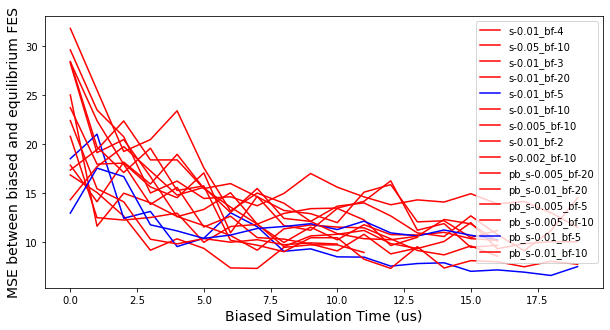

In [18]:
# plot convergences across all conditions

print(metad_dir_list)
fig, ax = plt.subplots(figsize=(10,5))

for score_list, conditions in zip(score_trajs, metad_dir_list):
    label = conditions.replace('../11bp_runs_', '').replace('_h-0.6_ns-1e+09', '')
    print(conditions, label, len(score_list))
    if '01_bf-5' in label: color='blue'
    else: color='red' 
    ax.plot(score_list, label=label, c=color)
    
ax.legend()
ax.set_ylabel('MSE between biased and equilibrium FES', fontsize=14)
ax.set_xlabel('Biased Simulation Time (us)',  fontsize=14)



mean diff score = 0.112 +- 0.13


Text(0, 0.5, '                                                  Probability Distribution')

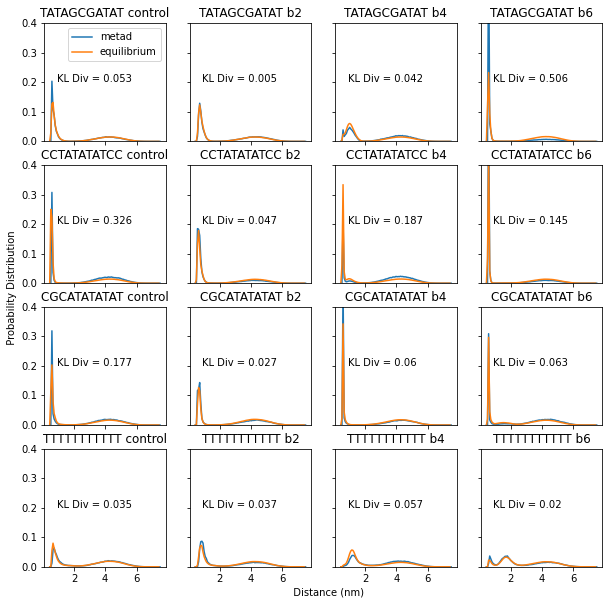

In [15]:
# repeat above for probability -- use KL divergence to compares distributions
fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True)

#metad_dir = '../11bp_runs_pb_s-0.005_bf-5_h-0.6_ns-1e+09'
metad_dir = '../11bp_runs_s-0.01_bf-5_h-0.6_ns-1e+09'

fes_min, fes_max = 20, 21

for nfes in range(fes_min, fes_max):
    diff_scores = []

    # load fes from equilibrim
    for seq, ax_row in zip(seq_list, axes):
        for (base_idx, base), ax in zip(base_dict.items(), ax_row):

            # load equilibrium data
            equ_fes = np.load(f'{equ_dir}/fes_{seq}_{base}.npy')
            equ_prob = np.load(f'{equ_dir}/prob_{seq}_{base}.npy')
            equ_prob = equ_prob/np.sum(equ_prob)
            #print(seq, base, len(equ_fes))

            # load metad 
            fes_path = glob.glob(f'{metad_dir}/{seq}_base-{base_idx}*')[0]
            fes_list = glob.glob(f'{fes_path}/fes_*.dat')
            temp = int(fes_path.split('temp')[-1][1:4])
            #nfes = 2 #len(fes_list)

            fes_final = f'{fes_path}/fes_{nfes-1}.dat'
            with open(fes_final, 'r') as f:
                metad_data = []
                lines = f.readlines()
                for i in range(5, len(lines)):
                    metad_data.append([float(idx) for idx in lines[i].split()])
                metad_data = np.array(metad_data)
            f.close()

            # specify metad bin edges and free energy
            metad_bins = metad_data[:, 0]
            metad_fes = metad_data[:, 1]
            
            # convert to probability:
            metad_prob = np.exp(-metad_fes/(R*temp))
            metad_prob /= np.sum(metad_prob)

            # normalize fes
            equ_fes = equ_fes-max(equ_fes[3:30])  #min(equ_fes)
            metad_fes = metad_fes-max(metad_fes[3:30])   #min(metad_fes)
            
            # calculate KL divergence between probability between two
            diff = entropy(metad_prob[1:90], equ_prob[1:90])
            diff_scores.append(diff)
            #print(seq, base, np.round(diff, 3))

            if 'inv' in metad_dir: 
                ax.plot(1/metad_bins, metad_prob, label='metad')  
            else: 
                ax.plot(metad_bins, metad_prob, label='metad')
            
            if nfes==fes_max-1: ax.annotate(f'KL Div = {np.round(diff, 3)}', (0.9, 0.2))
            if nfes==fes_min: axes[0, 0].legend() 
                
            ax.plot(equ_bins[:-1], equ_prob, label='equilibrium')
            ax.set_title(f'{seq} {base}')
            ax.set_ylim(0, .4)

    print(f'\n\nmean diff score = {np.round(np.mean(diff_scores), 3)} +- {np.round(np.std(diff_scores), 3)}', )
    #glob.glob(f'../{dir_str}/*')
    

# set common legend and labels
spaces = ' '*50
axes[-1, 1].set_xlabel(f'{spaces}Distance (nm)')
axes[2, 0].set_ylabel(f'{spaces}Probability Distribution')



mean diff score =  5.722872861086694


Text(0, 0.5, '                                                  Free energy (kJ/mol)')

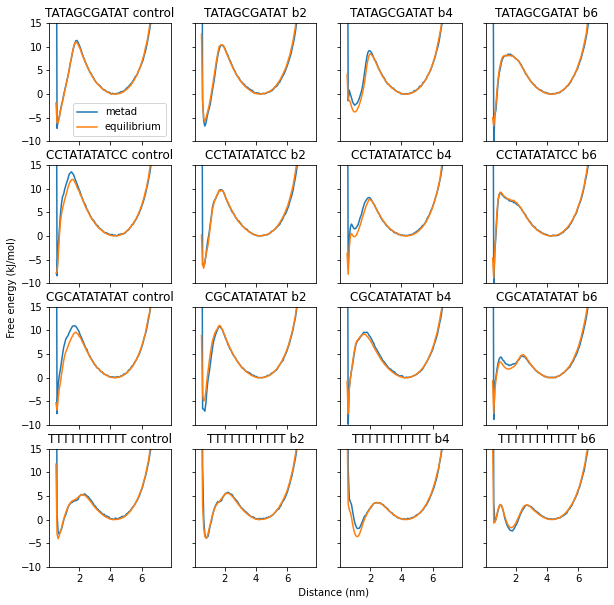

In [10]:
## compare free energies averaged over last 10 fes
## try optimal sig = 0.01 bf = 5 combination

# all fes files should have already been generated using e.g. plot_convergence
seq_list = ['TATAGCGATAT', 'CCTATATATCC', 'CGCATATATAT','TTTTTTTTTTT'] #  #  #'CGCATATATAT'
base_dict = {0:'control', 2:'b2', 4:'b4', 6:'b6'}
fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True)

# specify equilibrium and metad directories
equ_dir = '../equilibrium_FES'
metad_dir = '../11bp_runs_s-0.01_bf-5_h-0.6_ns-1e+09'
diff_scores = []

use_avg_fes = True
avg_fes = 'fes_15_20_avg.npy'
nfes = 20

# load bins
equ_bins = np.load(f'{equ_dir}/bins_edges.npy')
R = 1.380 * 6.022 / 1000 #kJ/mol/K
    
# load fes from equilibrim
for seq, ax_row in zip(seq_list, axes):
    for (base_idx, base), ax in zip(base_dict.items(), ax_row):

        # load equilibrium data
        equ_fes = np.load(f'{equ_dir}/fes_{seq}_{base}.npy')
        equ_prob = np.load(f'{equ_dir}/prob_{seq}_{base}.npy')
        
        #load metad 
        fes_path = glob.glob(f'{metad_dir}/{seq}_base-{base_idx}*')[0]
        temp = int(fes_path.split('temp')[-1][1:4])

        # load metad from avg npy
        if use_avg_fes:
            fes_final = f'{fes_path}/{avg_fes}'
            metad_data = np.load(fes_final)
        
        #load meta from final traj
        else:
            fes_final = f'{fes_path}/fes_{nfes-1}.dat'
            with open(fes_final, 'r') as f:
                metad_data = []
                lines = f.readlines()
                for i in range(5, len(lines)):
                    metad_data.append([float(idx) for idx in lines[i].split()])
                metad_data = np.array(metad_data)
            f.close()
        
        # specify metad bin edges and free energy
        metad_bins = metad_data[:, 0]
        metad_fes = metad_data[:, 1]

        # normalize fes
        equ_fes = equ_fes-min(equ_fes[30:])  #
        metad_fes = metad_fes-min(metad_fes[30:])   #min(metad_fes)

        # calculate differcen between two
        diff = np.sqrt(np.sum((equ_fes[2:80]-metad_fes[2:80])**2))
        diff_scores.append(diff)
        #print(diff, equ_bins[:3], metad_bins[:3])

        if 'inv' in metad_dir: 
            ax.plot(1/metad_bins, metad_fes, label='metad')
            print(metad_bins[:3], (1/metad_bins)[:3])
        else: ax.plot(metad_bins, metad_fes, label='metad')
        ax.plot(equ_bins[:-1], equ_fes, label='equilibrium')
        ax.set_title(f'{seq} {base}')
        ax.set_ylim(-10, 15)

mean_score = np.mean(diff_scores)
mean_score_list.append(mean_score)
print('\n\nmean diff score = ', np.mean(mean_score))
#glob.glob(f'../{dir_str}/*')

# set common legend and labels
spaces = ' '*50
axes[0, 0].legend()
axes[-1, 1].set_xlabel(f'{spaces}Distance (nm)')
axes[2, 0].set_ylabel(f'{spaces}Free energy (kJ/mol)')



mean diff score = 0.106 +- 0.108


Text(0, 0.5, '                                                  Probability Distribution')

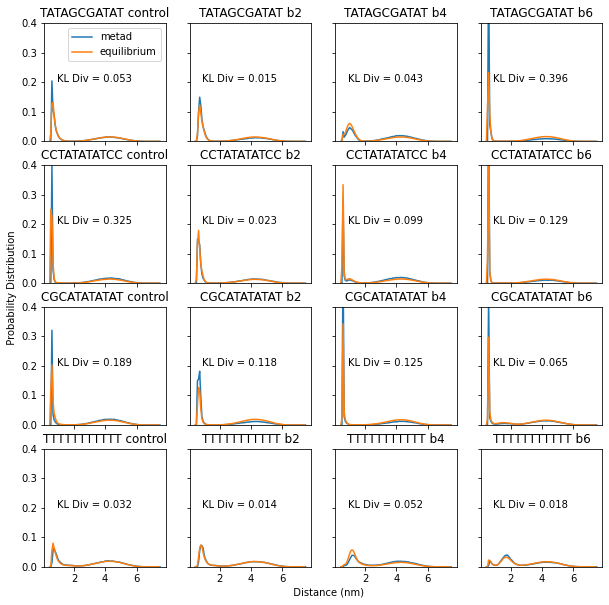

In [14]:
# use average for probability as well

# repeat above for probability -- use KL divergence to compares distributions
fig, axes = plt.subplots(4, 4, figsize=(10, 10), sharey=True, sharex=True)

# specify equilibrium and metad directories
metad_dir = '../11bp_runs_s-0.01_bf-5_h-0.6_ns-1e+09'
avg_fes = 'fes_10_20_avg.npy'
diff_scores = []

# load fes from equilibrim
for seq, ax_row in zip(seq_list, axes):
    for (base_idx, base), ax in zip(base_dict.items(), ax_row):

        # load equilibrium data
        equ_fes = np.load(f'{equ_dir}/fes_{seq}_{base}.npy')
        equ_prob = np.load(f'{equ_dir}/prob_{seq}_{base}.npy')
        equ_prob = equ_prob/np.sum(equ_prob)
        #print(seq, base, len(equ_fes))

        # load metad 
        fes_path = glob.glob(f'{metad_dir}/{seq}_base-{base_idx}*')[0]
        fes_list = glob.glob(f'{fes_path}/fes_*.dat')
        temp = int(fes_path.split('temp')[-1][1:4])
        #nfes = 2 #len(fes_list)

        # load metad from avg npy
        fes_final = f'{fes_path}/{avg_fes}'
        metad_data = np.load(fes_final)
        
        # specify metad bin edges and free energy
        metad_bins = metad_data[:, 0]
        metad_fes = metad_data[:, 1]

        # convert to probability:
        metad_prob = np.exp(-metad_fes/(R*temp))
        metad_prob /= np.sum(metad_prob)

        # normalize fes
        equ_fes = equ_fes-min(equ_fes[30:])  #min(equ_fes)
        metad_fes = metad_fes-min(metad_fes[30:])   #min(metad_fes)

        # calculate KL divergence between probability between two
        diff = entropy(metad_prob[1:90], equ_prob[1:90])
        diff_scores.append(diff)
        #print(seq, base, np.round(diff, 3))

        if 'inv' in metad_dir: 
            ax.plot(1/metad_bins, metad_prob, label='metad')  
        else: 
            ax.plot(metad_bins, metad_prob, label='metad')

        ax.annotate(f'KL Div = {np.round(diff, 3)}', (0.9, 0.2))
        axes[0, 0].legend() 

        ax.plot(equ_bins[:-1], equ_prob, label='equilibrium')
        ax.set_title(f'{seq} {base}')
        ax.set_ylim(0, .4)

print(f'\n\nmean diff score = {np.round(np.mean(diff_scores), 3)} +- {np.round(np.std(diff_scores), 3)}', )
#glob.glob(f'../{dir_str}/*')
    

# set common legend and labels
spaces = ' '*50
axes[-1, 1].set_xlabel(f'{spaces}Distance (nm)')
axes[2, 0].set_ylabel(f'{spaces}Probability Distribution')